# 🎒 Backpack Prediction Challenge

**FEUP 2024/2025 - L.EIC029 IART**

- Bruno Oliveira - 202208700  
- Henrique Fernandes - 202204988  
- Rodrigo Coelho - 202205188  

> Based on Kaggle Playground Season 5, Episode 2  
> April 2025

---

## 📖 Introduction

This project is related to the application of Supervised Learning techniques to real world classification problems. Specifically, we will develop and evaluate machine learning models that accurately predict the price of student backpacks (target variable), based on a variety of input attributes.

For this we will use a labeled dataset from Kaggle which contains different bag characteristics and we want to understand how they influence the price.

[Link to Backpack Prediction Challenge](https://www.kaggle.com/competitions/playground-series-s5e2/data)

We will follow the machine learning pipeline: data preprocessing, problem definition and target identification, model selection and parameter tuning, model training and testing, and result evaluation and comparison.  

---

## ⚙️ Project setup

### 📦 Virtual Environment

In order to setup the project, use the following commands to setup a virtual environment and install the needed dependencies:

In [18]:
!python3 -m venv .venv
!source .venv/bin/activate
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


Once the dependencies are installed, the script below can be used to download the dataset from the Kaggle competition, using your Kaggle account.

<div class="alert alert-block alert-warning">
<b>Warning:</b> Don't forget to download the Kaggle token associated with your account from the <a href="https://www.kaggle.com/settings">Settings page</a>, move it to the current folder and join the <a href="https://www.kaggle.com/competitions/playground-series-s5e2/">Kaggle playground competition</a>.
</div>

In [19]:
import os
from pathlib import Path

os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

data_dir = Path("data")
data_dir.mkdir(exist_ok=True)
dataset_zip = data_dir.joinpath("playground-series-s5e2.zip")
dataset_train = data_dir.joinpath("train.csv")
dataset_extra = data_dir.joinpath("training_extra.csv")

if not dataset_train.exists() or not dataset_extra.exists():
    if not dataset_zip.exists():
        print("Dataset zip not found. Downloading from Kaggle...")
        !kaggle competitions download -c playground-series-s5e2
        print("Download complete.")
    else:
        print("Dataset zip already exists.")

    print("Unzipping the dataset...")
    !unzip -o playground-series-s5e2.zip -d data
    !rm playground-series-s5e2.zip
else:
    print("Dataset already exists. Skipping download and extraction.")


Dataset already exists. Skipping download and extraction.


### 📂 Loading the Datasets

With the dependencies met and having downloaded the dataset, we can now load it into our environment. The following commands will load the `train.csv` dataset which contains 300000 entries and is used to train the models.

In [20]:
import pandas as pd

data = pd.read_csv(dataset_train)

data.info()

print("\nFirst 3 rows of the dataset:")
print(data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB

First 3 rows of the dataset:
   id         Brand Material    Size  Compartments Laptop Compartment  \
0   0      Jansport  Leather  Medium           

___

## 🔍 Exploratory Data Analysis

### 🌐 Dataset Overview

As mentioned before, the training dataset consists of *300000* rows of data related to *9* backpack features and the **price** (target variable). 

Most of these features are **categorical** (brand, material, size, laptop compartment, waterproof, style and color) while the others are **numerical** (compartments and weight capacity).

In [24]:
def overview_data(data, title):
    print(title)
    data_shape = data.shape
    print(f"\nNumber of rows: {data_shape[0]}")
    print(f"Number of columns: {data_shape[1]}")
    print("\nData types of each column:")
    print(data.dtypes)

overview_data(data, "Training Dataset Overview")

Training Dataset Overview

Number of rows: 300000
Number of columns: 11

Data types of each column:
id                        int64
Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object


### ❓ Missing Data

Although the challenge states that the training dataset was generated from a deep learning model trained on another dataset, most of the features include some missing values which were probably introduced to challenge the data preprocessing.

The percentage of **missing values for each feature is below 3.5%** and the **overall percentage of rows with at least one missing value is less than 18%** of the entire training dataset. 

In [ ]:
missing_values = pd.DataFrame({
    'Column': data.columns,
    'Missing Train Values': data.isnull().sum().values,
    'Percentage of Missing Train Values': data.isnull().sum().values / len(data) * 100
})

missing_values = missing_values[~missing_values['Column'].isin(['id', 'Price'])]

summary_row = pd.DataFrame([{
    'Column': 'Rows with Missing Values',
    'Missing Train Values': data.isnull().any(axis=1).sum(),
    'Percentage of Missing Train Values': data.isnull().any(axis=1).sum() / len(data) * 100
}])

missing_values = pd.concat([missing_values, summary_row], ignore_index=True)

missing_values

### 🧬 Duplicated Data

Despite having a moderate amount of missing data, there are no duplicated rows in the training dataset. 

In [ ]:
data_duplicates = data.drop('id', axis=1).duplicated().sum()
print(f"Data duplicates: {data_duplicates}")

### 🧮 Distribution of Data

When it comes to data distribution, all columns follow a relatively constant distribution without any specific outliers or imbalances. Although every categorical feature has a (slightly) dominant category, there are no significant differences in terms of the frequencies of each value. This is also the case for the numeric columns where the distribution of the value count is approximately constant.

The graphs don't show any major skewness meaning the dataset appears to be well-suited for classification of all types of backpacks without a specific bias from the training dataset.

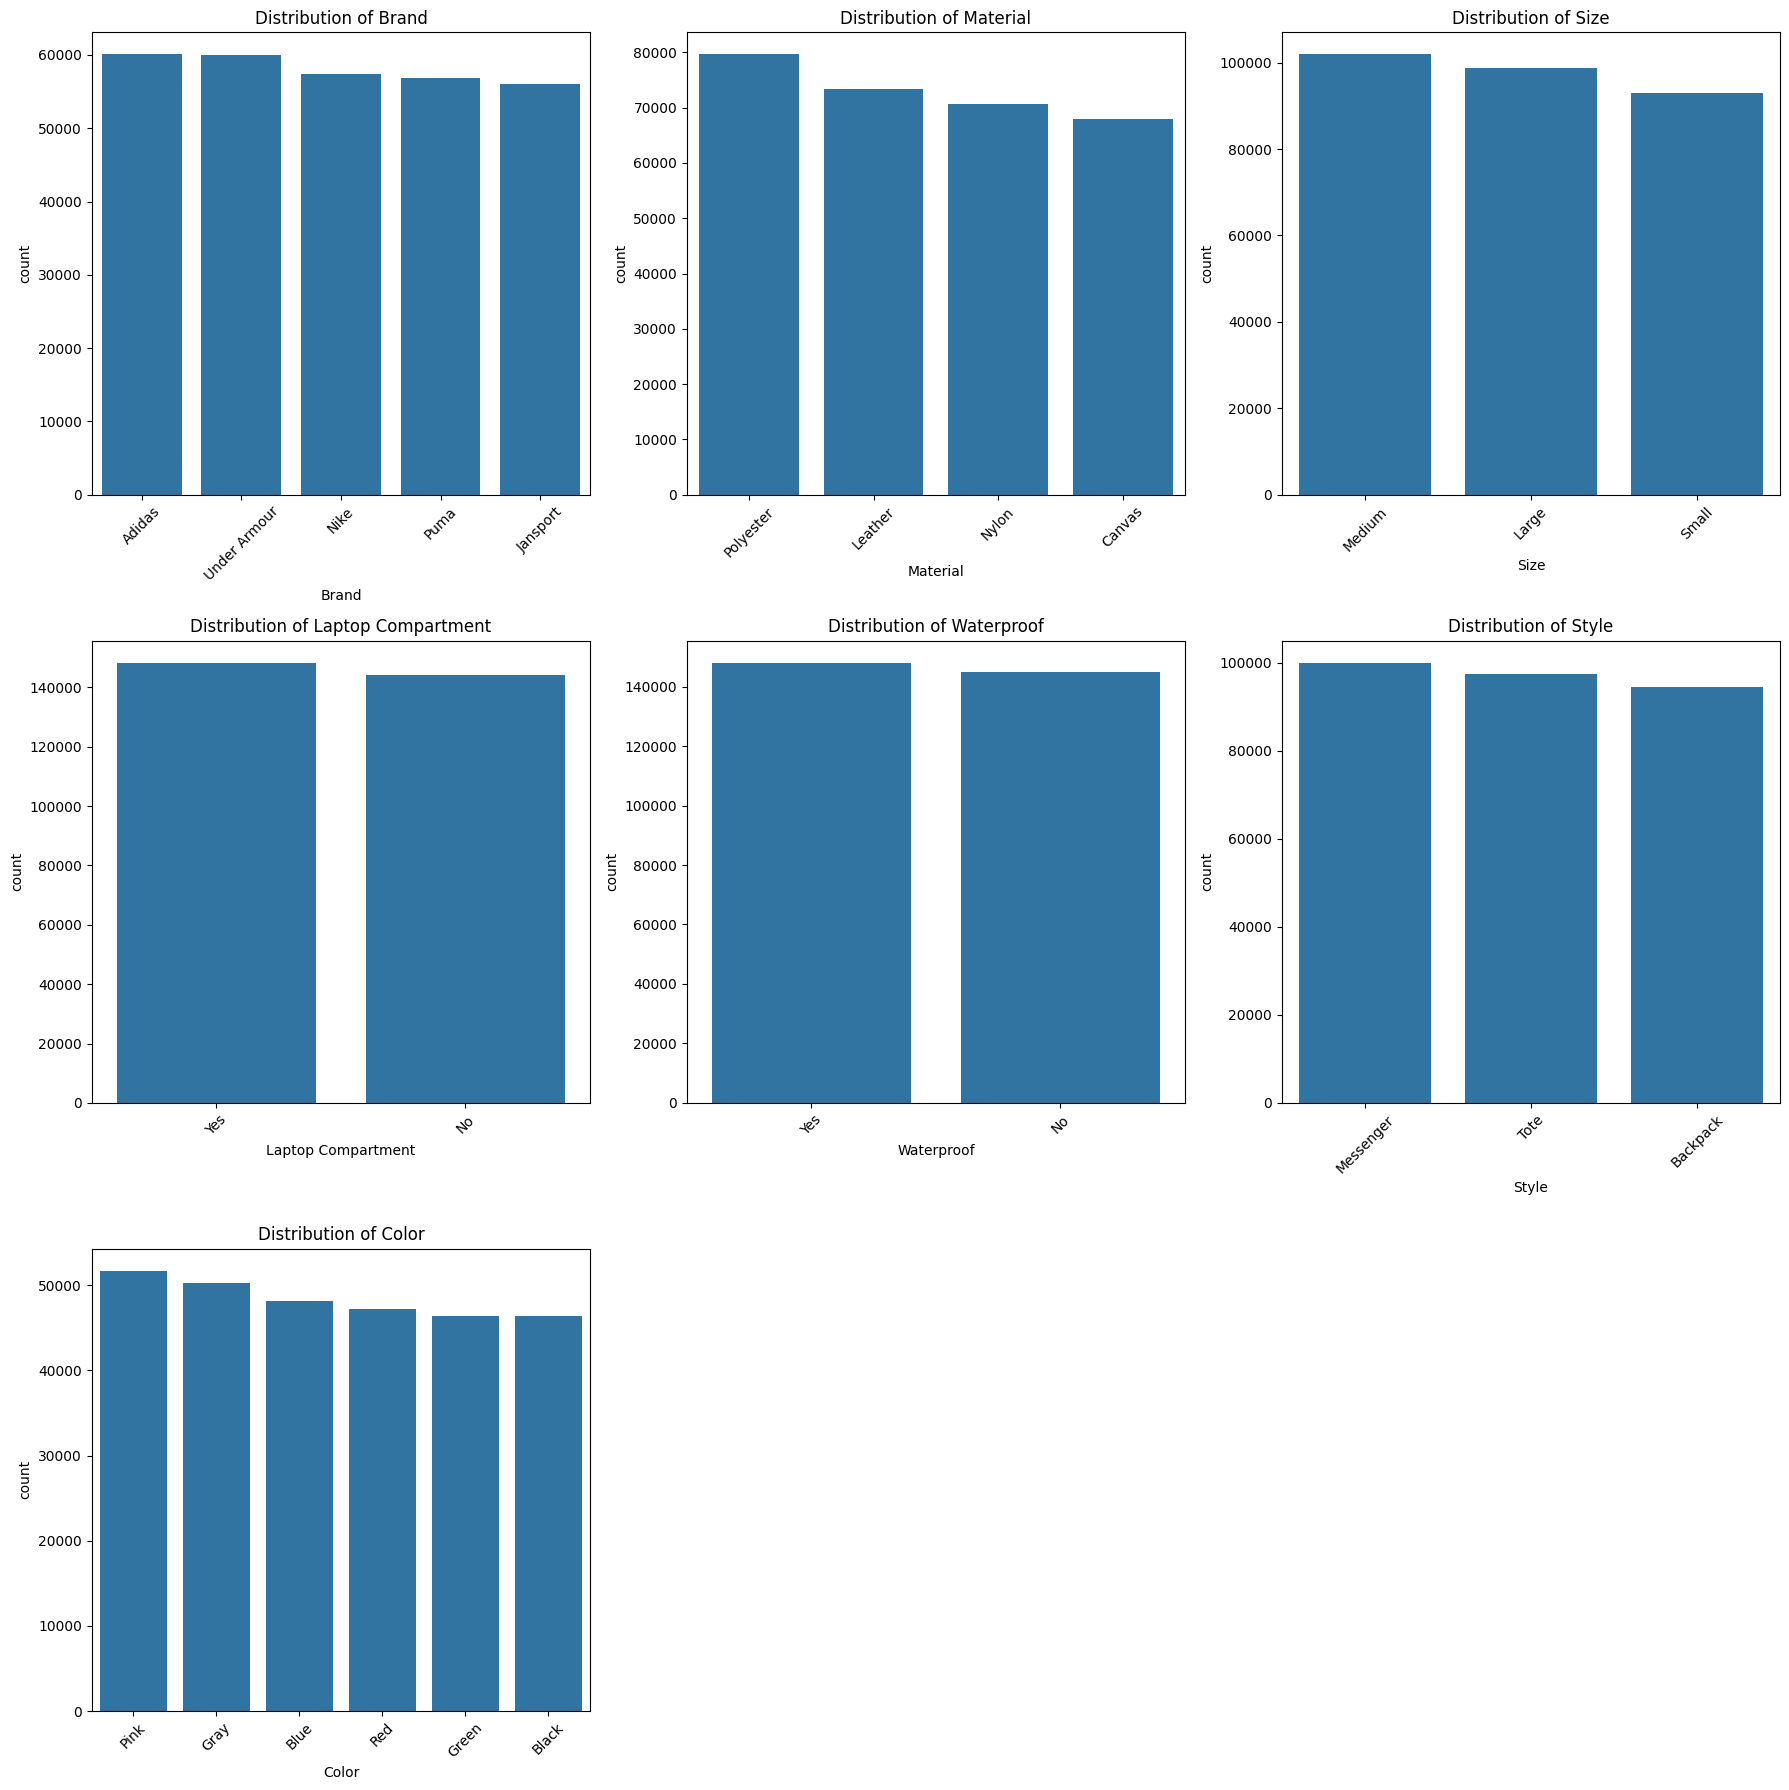

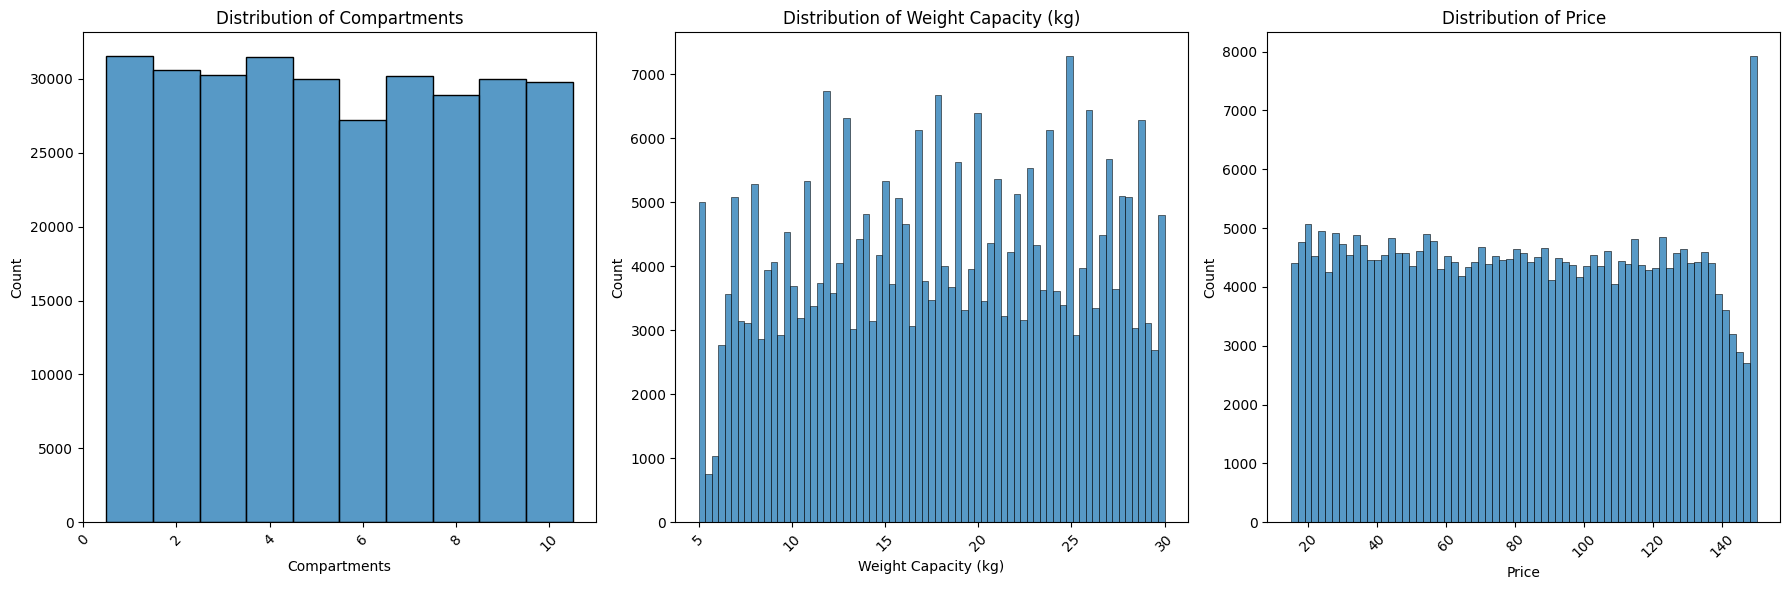

,count,mean,std,min,25%,50%,75%,max
Compartments,300000.0,5.443590,2.890766,1.0,3.000000,5.000000,8.000000,10.0
Weight Capacity (kg),299862.0,18.029994,6.966914,5.0,12.097867,18.068614,24.002375,30.0
Price,300000.0,81.411107,39.039340,15.0,47.384620,80.956120,115.018160,150.0


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

categorical_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
numerical_columns = ['Compartments', 'Weight Capacity (kg)', 'Price']

FIGURE_WIDTH = 18
PLOTS_PER_ROW = 3

def plot_categorical_columns(df):
    num_columns = len(categorical_columns)
    num_rows = math.ceil(num_columns / PLOTS_PER_ROW)

    fig, axes = plt.subplots(num_rows, PLOTS_PER_ROW, figsize=(FIGURE_WIDTH, FIGURE_WIDTH / PLOTS_PER_ROW * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(categorical_columns):
        sns.countplot(data=df, x=column, order=df[column].value_counts().index, ax=axes[i])
        axes[i].set_title(f"Distribution of {column}")
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def plot_numeric_columns(df):
    num_columns = len(numerical_columns)
    num_rows = math.ceil(num_columns / PLOTS_PER_ROW)

    fig, axes = plt.subplots(num_rows, PLOTS_PER_ROW, figsize=(FIGURE_WIDTH, FIGURE_WIDTH / PLOTS_PER_ROW * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(numerical_columns):
        sns.histplot(df[column], ax=axes[i], discrete=column == 'Compartments')
        axes[i].set_title(f"Distribution of {column}")
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_categorical_columns(data)
plot_numeric_columns(data)

data.drop('id', axis=1).describe().T

### 🔗 Data Correlation

The correlation analysis revealed that no strong linear relationships appear to exist between the columns that could influence the target variable and, consequently, the model training.

As it can be seen both from the Categorical vs. Categorical countplots, there are not major correlations between different categrical features of the dataset. A similar conclusion can be taken from the correlation heatmap of the numeric columns.

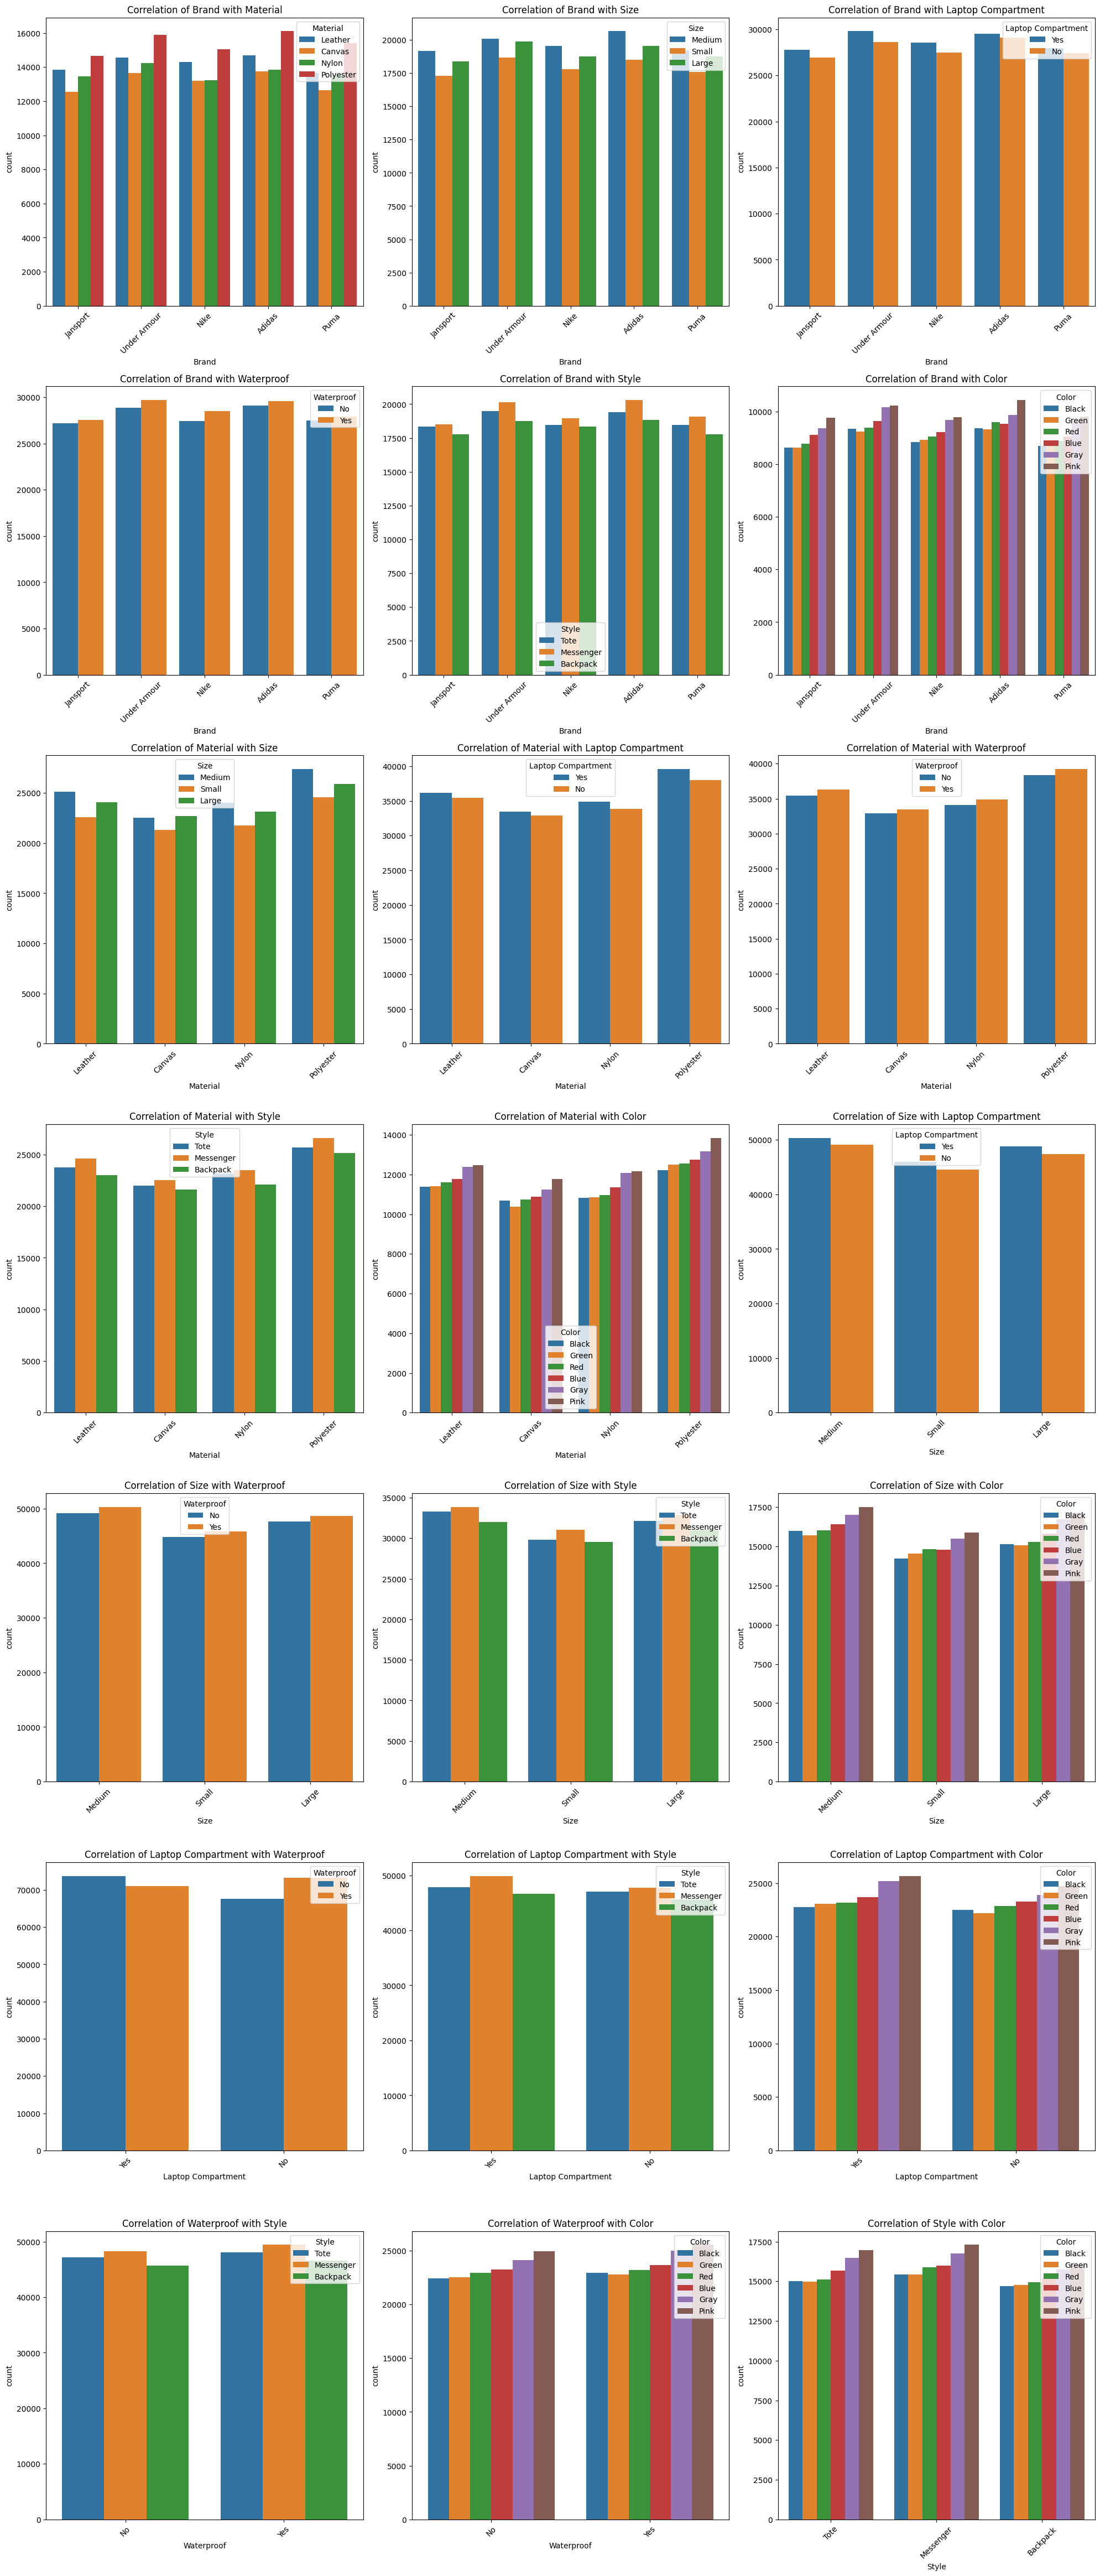

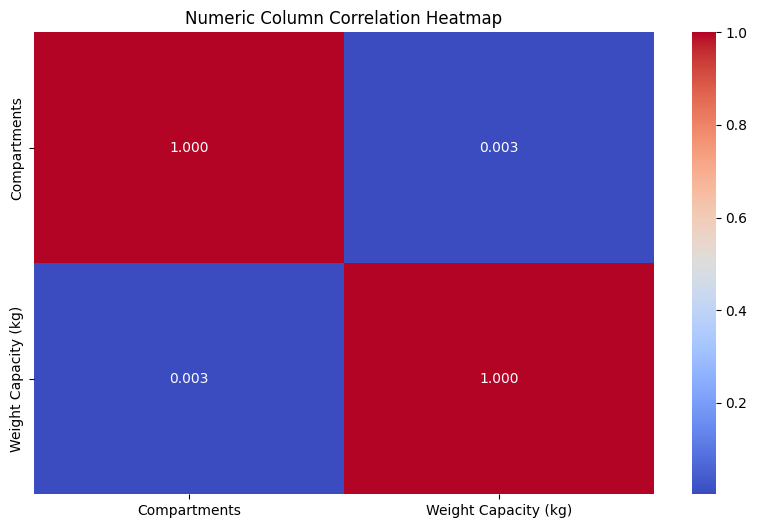

In [33]:
FIGURE_WIDTH = 20
PLOTS_PER_ROW = 3

def plot_categorical_corr(df):
    num_columns = (len(categorical_columns) * (len(categorical_columns) - 1)) // 2
    num_rows = math.ceil(num_columns / PLOTS_PER_ROW)

    fig, axes = plt.subplots(num_rows, PLOTS_PER_ROW, figsize=(FIGURE_WIDTH, FIGURE_WIDTH / PLOTS_PER_ROW * num_rows))
    axes = axes.flatten()

    plot_idx = 0
    for i in range(len(categorical_columns)):
        for j in range(i + 1, len(categorical_columns)):
            sns.countplot(x=categorical_columns[i], hue=categorical_columns[j], data=data, ax=axes[plot_idx])
            axes[plot_idx].set_title(f"Correlation of {categorical_columns[i]} with {categorical_columns[j]}")
            axes[plot_idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
            plot_idx += 1

    for j in range(plot_idx, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def plot_numeric_corr(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data[[col for col in numerical_columns if col != 'Price']].corr(), annot=True, cmap='coolwarm', fmt=".3f", cbar=True)
    plt.title(f"Numeric Column Correlation Heatmap")
    plt.show()

plot_categorical_corr(data)
plot_numeric_corr(data)

# Data Preprocessing

### Data Imputation

In [ ]:
def impute_data(df):
    for col in categorical_columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    for col in numerical_columns:
        df[col] = df[col].fillna(df[col].median())

impute_data(data)

### Data Encoding

In [ ]:
new_columns = ['IBrand', 'IMaterial', 'ISize', 'Has_Laptop_Compartment', 'Is_Waterproof', 'IStyle', 'IColor']

def encode_data(df):
    for col in ['Brand', 'Material', 'Style', 'Color']:
        df['I' + col] = df[col].astype('category').cat.codes

    df['ISize'] = df['Size'].map({'Small': 1, 'Medium': 2, 'Large': 3})

    df['Has_Laptop_Compartment'] = df['Laptop Compartment'].map({'Yes': 1, 'No': 0})
    df['Is_Waterproof'] = df['Waterproof'].map({'Yes': 1, 'No': 0})

encode_data(data)

### Data Normalization

In [ ]:
new_columns += ['Weight_Capacity_Ratio']

def normalize_data(df):
    df['Weight_Capacity_Ratio'] = df['Weight Capacity (kg)'] / df['Weight Capacity (kg)'].max()

normalize_data(data)

# Target Definition

In [ ]:
final_columns = new_columns + ['Compartments']

X = data[final_columns]
y = data['Price']

print(X.head())
print(y.head())

___

## Model Building

### Parameter Tuning

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, KFold

def tune_params(model, param_grid, X, y, cv=10):
    cv = KFold(n_splits=cv, shuffle=True, random_state=1)

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X, y)

    print(f"Best parameters:")
    for param_name, param_value in grid_search.best_params_.items():
        print(f"  {param_name}: {param_value}")

    return grid_search.best_params_

### Model Evaluation

In [ ]:
import time

def evaluate_regressor(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=1)

    mse_scores = []
    mae_scores = []
    r2_scores = []
    training_times = []
    testing_times = []

    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        start_train = time.time()
        model.fit(X_train, y_train)
        end_train = time.time()
        training_times.append(end_train - start_train)

        start_test = time.time()
        y_pred = model.predict(X_test)
        end_test = time.time()
        testing_times.append(end_test - start_test)

        mse_scores.append(mean_squared_error(y_test, y_pred))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))

    print(f"Avg Mean Squared Error (MSE): {np.mean(mse_scores):.4f}")
    print(f"Avg Root Mean Squared Error (RMSE): {np.sqrt(np.mean(mse_scores)):.4f}")
    print(f"Avg Mean Absolute Error (MAE): {np.mean(mae_scores):.4f}")
    print(f"Avg R² Score: {np.mean(r2_scores):.4f}")
    print(f"Avg Training Time: {np.mean(training_times):.4f} seconds")
    print(f"Avg Testing Time: {np.mean(testing_times):.4f} seconds")

In [ ]:
def tune_and_eval(model, param_grid, X, y):
    print(f"Tuning parameters for {model.__class__.__name__}...")
    best_params = tune_params(model, param_grid, X, y)
    model.set_params(**best_params)

    print()
    print(f"Evaluating {model.__class__.__name__} with best parameters...")
    evaluate_regressor(model, X, y)

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)
param_grid = {
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': [1, 2, 3, 4, 5, None],
    'max_features': [1, 2, 3, 5, None],
}

tune_and_eval(model, param_grid, X, y)

In [ ]:
# from sklearn.tree import export_graphviz
# from sklearn import tree
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree
# plt.figure(figsize=(100, 20))
# plot_tree(model, filled=True, feature_names=X.columns, fontsize=10, max_depth=5)
# plt.title("Decision Tree Visualization")
# plt.show()


In [ ]:
# # get all the values from hte Brand column
# brand_values = train_data['Brand'].unique()
# # get average price per brand
# avg_price_per_brand = train_data.groupby('Brand')['Price'].mean().sort_values(ascending=False)
# avg_price_per_brand
